# Background

- **Author**: `<林宜萱>`
- **Created At**: `<2025-10-30>`
- **Research Motivation and Context (why are we interested in the findings?)：**
本研究旨在分析各類遊戲在不同時間點的折扣幅度變化，並探討其與遊戲特徵（如年齡、好評率、是否支援多人模式）及成長變數（如粉絲數變化）之間的關係。透過統計圖表與回歸模型的整合，希望揭示影響折扣率的重要因素，進而理解遊戲市場的價格運作邏輯。
- **Main Findings and Takeaways：**  
    - 折扣幅度整體呈現穩定：分析結果顯示折扣活動在特定時期（例如大型促銷季）集中，折扣幅度於年度中有明顯高峰。

    - 多人遊戲與固定折扣機制具顯著影響：多人遊戲平均折扣率較高。

    - 相關係數熱圖揭示共線性現象：部分變數間存在高相關性（如不同週期的成長率），需於模型中謹慎處理以避免過度解釋。

    綜合來看，遊戲折扣幅度受到多重因素交互影響，特別是市場反應變數，是最主要的解釋來源。
- **Future Direciton：**
    - 納入更多動態變數：如近期遊戲上架數量、評論變化速率、促銷活動期間等，以提升模型對折扣時機的預測力。

    - 建立時間序列預測模型：預測不同遊戲的折扣周期性變化。

    - 比較不同遊戲類型或發行商之間的差異：分析不同遊戲類型或發行商在折扣策略上的差異。

    - 結合機器學習模型進行折扣預測：例如利用 Random Forest 或 XGBoost 模型預測折扣率，以驗證變數重要性並提升實務應用價值。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False  


plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)


In [3]:
df = pd.read_csv('../data/processed/extent-of-discount-rate-DE.csv')
df.head(10)

,Date,GameID,Type,MultiPlayer,Publisher,ConstantDiscount,DiscountRate,DiscountDuration,Age,AccumulatedPositiveRate,...,PlayerGrowthRate2W,PlayerGrowthRate1M,FollowersGrowthRate1W,FollowersGrowthRate2W,FollowersGrowthRate1M,PositiveRateGrowthRate1W,PositiveRateGrowthRate2W,PositiveRateGrowthRate1M,DLC_since_last_discount,Sequel_since_last_discount
0,2023-06-29,10,Action,1,Valve,0,0.903226,14,22.671233,0.975168,...,-0.033624,-0.037584,0.000673,0.001362,0.003116,0.000053,0.000015,0.000023,0,0
1,2023-09-12,10,Action,1,Valve,0,0.903226,7,22.876712,0.974990,...,0.022963,0.003837,0.000553,0.001087,0.002301,0.000004,0.000031,-0.000026,0,0
2,2023-11-21,10,Action,1,Valve,0,0.903226,7,23.068493,0.974686,...,-0.039165,0.015256,0.001381,0.002082,0.004059,-0.000146,-0.000165,-0.000152,0,0
3,2023-12-21,10,Action,1,Valve,0,0.897849,14,23.150685,0.974675,...,-0.033895,-0.006214,0.000790,0.001743,0.004781,0.000016,0.000014,-0.000011,0,0
4,2024-03-14,10,Action,1,Valve,0,0.903226,7,23.380822,0.974604,...,0.044649,0.012697,0.000952,0.001814,0.003629,0.000002,-0.000022,-0.000005,0,0
5,2024-06-27,10,Action,1,Valve,0,0.903226,14,23.668493,0.974511,...,-0.063312,0.025032,0.000744,0.001476,0.002994,-0.000007,0.000012,-0.000059,0,0
6,2024-11-27,10,Action,1,Valve,0,0.801075,7,24.087671,0.974273,...,0.028233,0.007734,0.001202,0.002417,0.004475,-0.000018,-0.000001,-0.000027,0,0
7,2024-12-19,10,Action,1,Valve,0,0.801075,14,24.147945,0.974334,...,0.044363,0.071397,0.000920,0.001795,0.005306,-0.000027,-0.000019,0.000042,0,0
8,2025-03-13,10,Action,1,Valve,0,0.801075,7,24.378082,0.974370,...,-0.092684,-0.085772,0.000899,0.001986,0.004205,0.000011,0.000018,-0.000009,0,0
9,2025-06-26,10,Action,1,Valve,0,0.801075,14,24.665753,0.974255,...,-0.100245,-0.053586,0.000823,0.001505,0.003369,-0.000006,-0.000016,-0.000076,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GameID,409.0,497223.716381,297538.620152,10.000000,244850.000000,477160.000000,644930.000000,1.145360e+06
MultiPlayer,409.0,0.503667,0.500599,0.000000,0.000000,1.000000,1.000000,1.000000e+00
ConstantDiscount,409.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DiscountRate,409.0,0.572639,0.193898,0.034301,0.500000,0.600457,0.701005,1.000000e+00
DiscountDuration,409.0,11.222494,5.299545,1.000000,7.000000,11.000000,14.000000,3.200000e+01
Age,409.0,7.025569,3.988664,2.501370,4.723288,6.027397,7.961644,2.466575e+01
AccumulatedPositiveRate,409.0,0.917436,0.065307,0.738856,0.885042,0.946994,0.967883,9.926429e-01
SalePeriod,409.0,0.415648,0.493437,0.000000,0.000000,0.000000,1.000000,1.000000e+00
PlayerGrowthRate1W,409.0,-0.030744,0.115158,-0.478403,-0.079700,-0.030970,0.011686,6.816883e-01
PlayerGrowthRate2W,409.0,-0.043624,0.193279,-0.721785,-0.134295,-0.054616,0.015807,1.277467e+00


### The actual analysis starts below
Make the graphs, summary statistics, regression model below.
Make sure you have followed the guidelines as specified in 
[專案資料夾結構、檔案命名與文件規範](https://docs.google.com/document/d/1sl6gEFMdmiGsiNjLe17UmZ30xKxq15U0Mb2B-Jvusxg/edit?tab=t.33iie8ybx7s4).


In [5]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

### A. 折扣幅度整體與時間趨勢

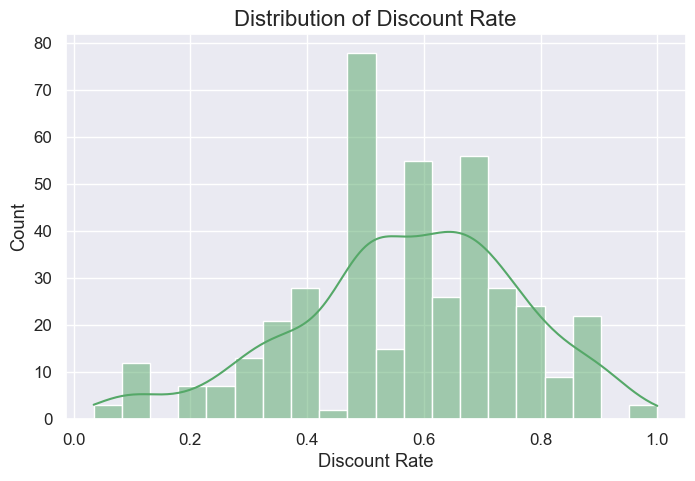

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["DiscountRate"], bins=20, kde=True, color="#55A868")
plt.title("Distribution of Discount Rate", fontsize=16)
plt.xlabel("Discount Rate")
plt.ylabel("Count")
plt.show()

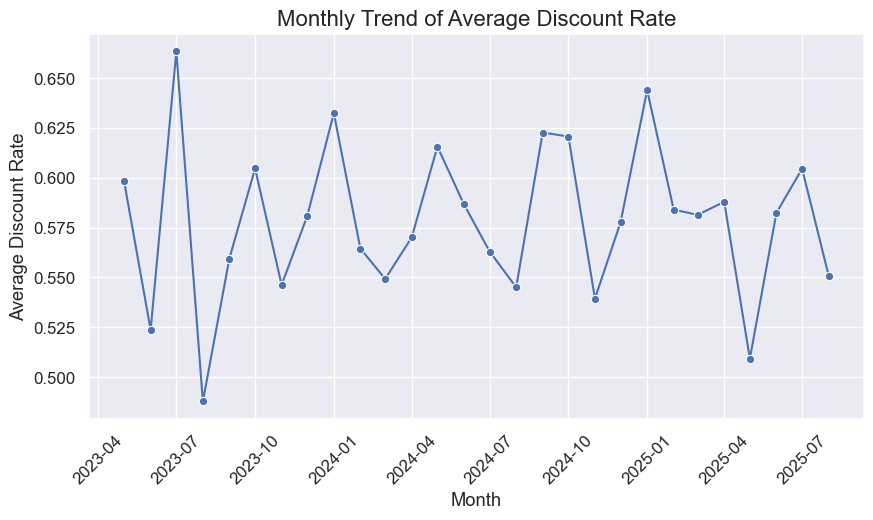

In [7]:
df["Month"] = df["Date"].dt.to_period("M")

# 按月平均折扣率
trend = df.groupby("Month")["DiscountRate"].mean().reset_index()

trend["Month"] = trend["Month"].dt.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x="Month", y="DiscountRate", marker="o", color="#4C72B0")
plt.title("Monthly Trend of Average Discount Rate", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Discount Rate")
plt.xticks(rotation=45)
plt.show()


### B. 遊戲特徵與折扣關係

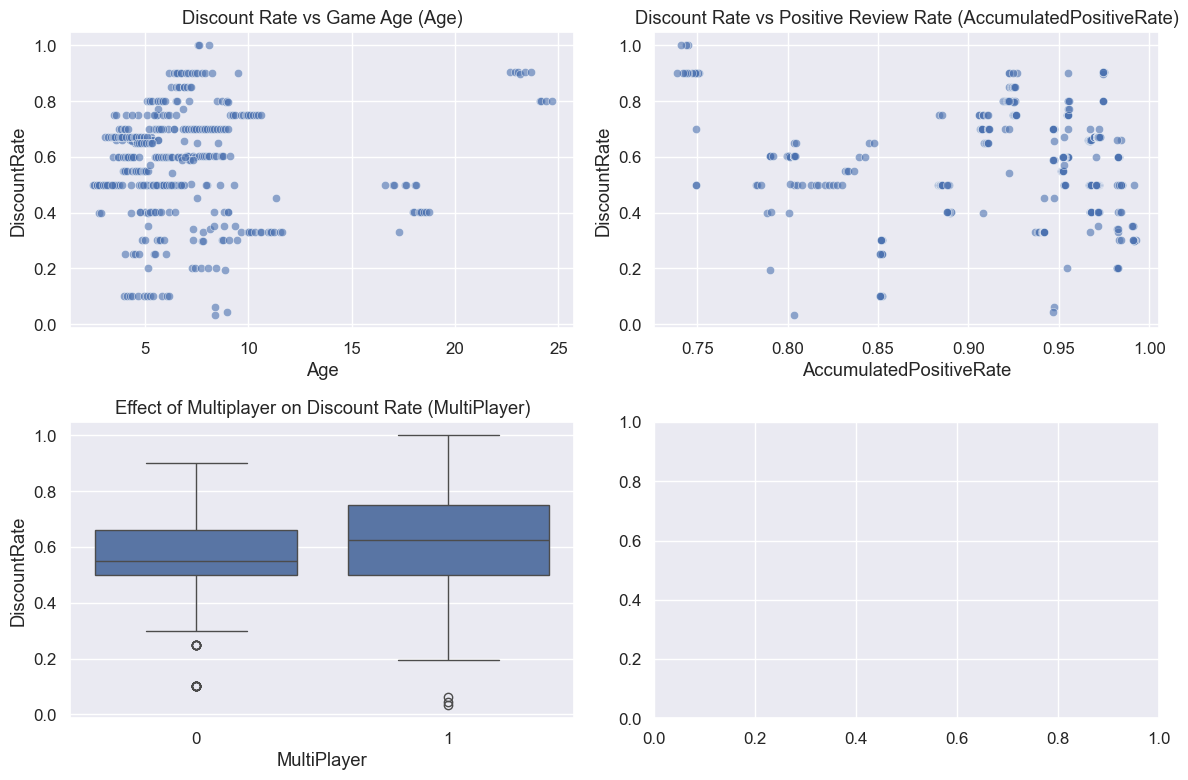

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(ax=axes[0,0], data=df, x="Age", y="DiscountRate", alpha=0.6)
axes[0,0].set_title("Discount Rate vs Game Age (Age)")

sns.scatterplot(ax=axes[0,1], data=df, x="AccumulatedPositiveRate", y="DiscountRate", alpha=0.6)
axes[0,1].set_title("Discount Rate vs Positive Review Rate (AccumulatedPositiveRate)")

sns.boxplot(ax=axes[1,0], data=df, x="MultiPlayer", y="DiscountRate")
axes[1,0].set_title("Effect of Multiplayer on Discount Rate (MultiPlayer)")

plt.tight_layout()
plt.show()

### C. 動態變數與折扣關係

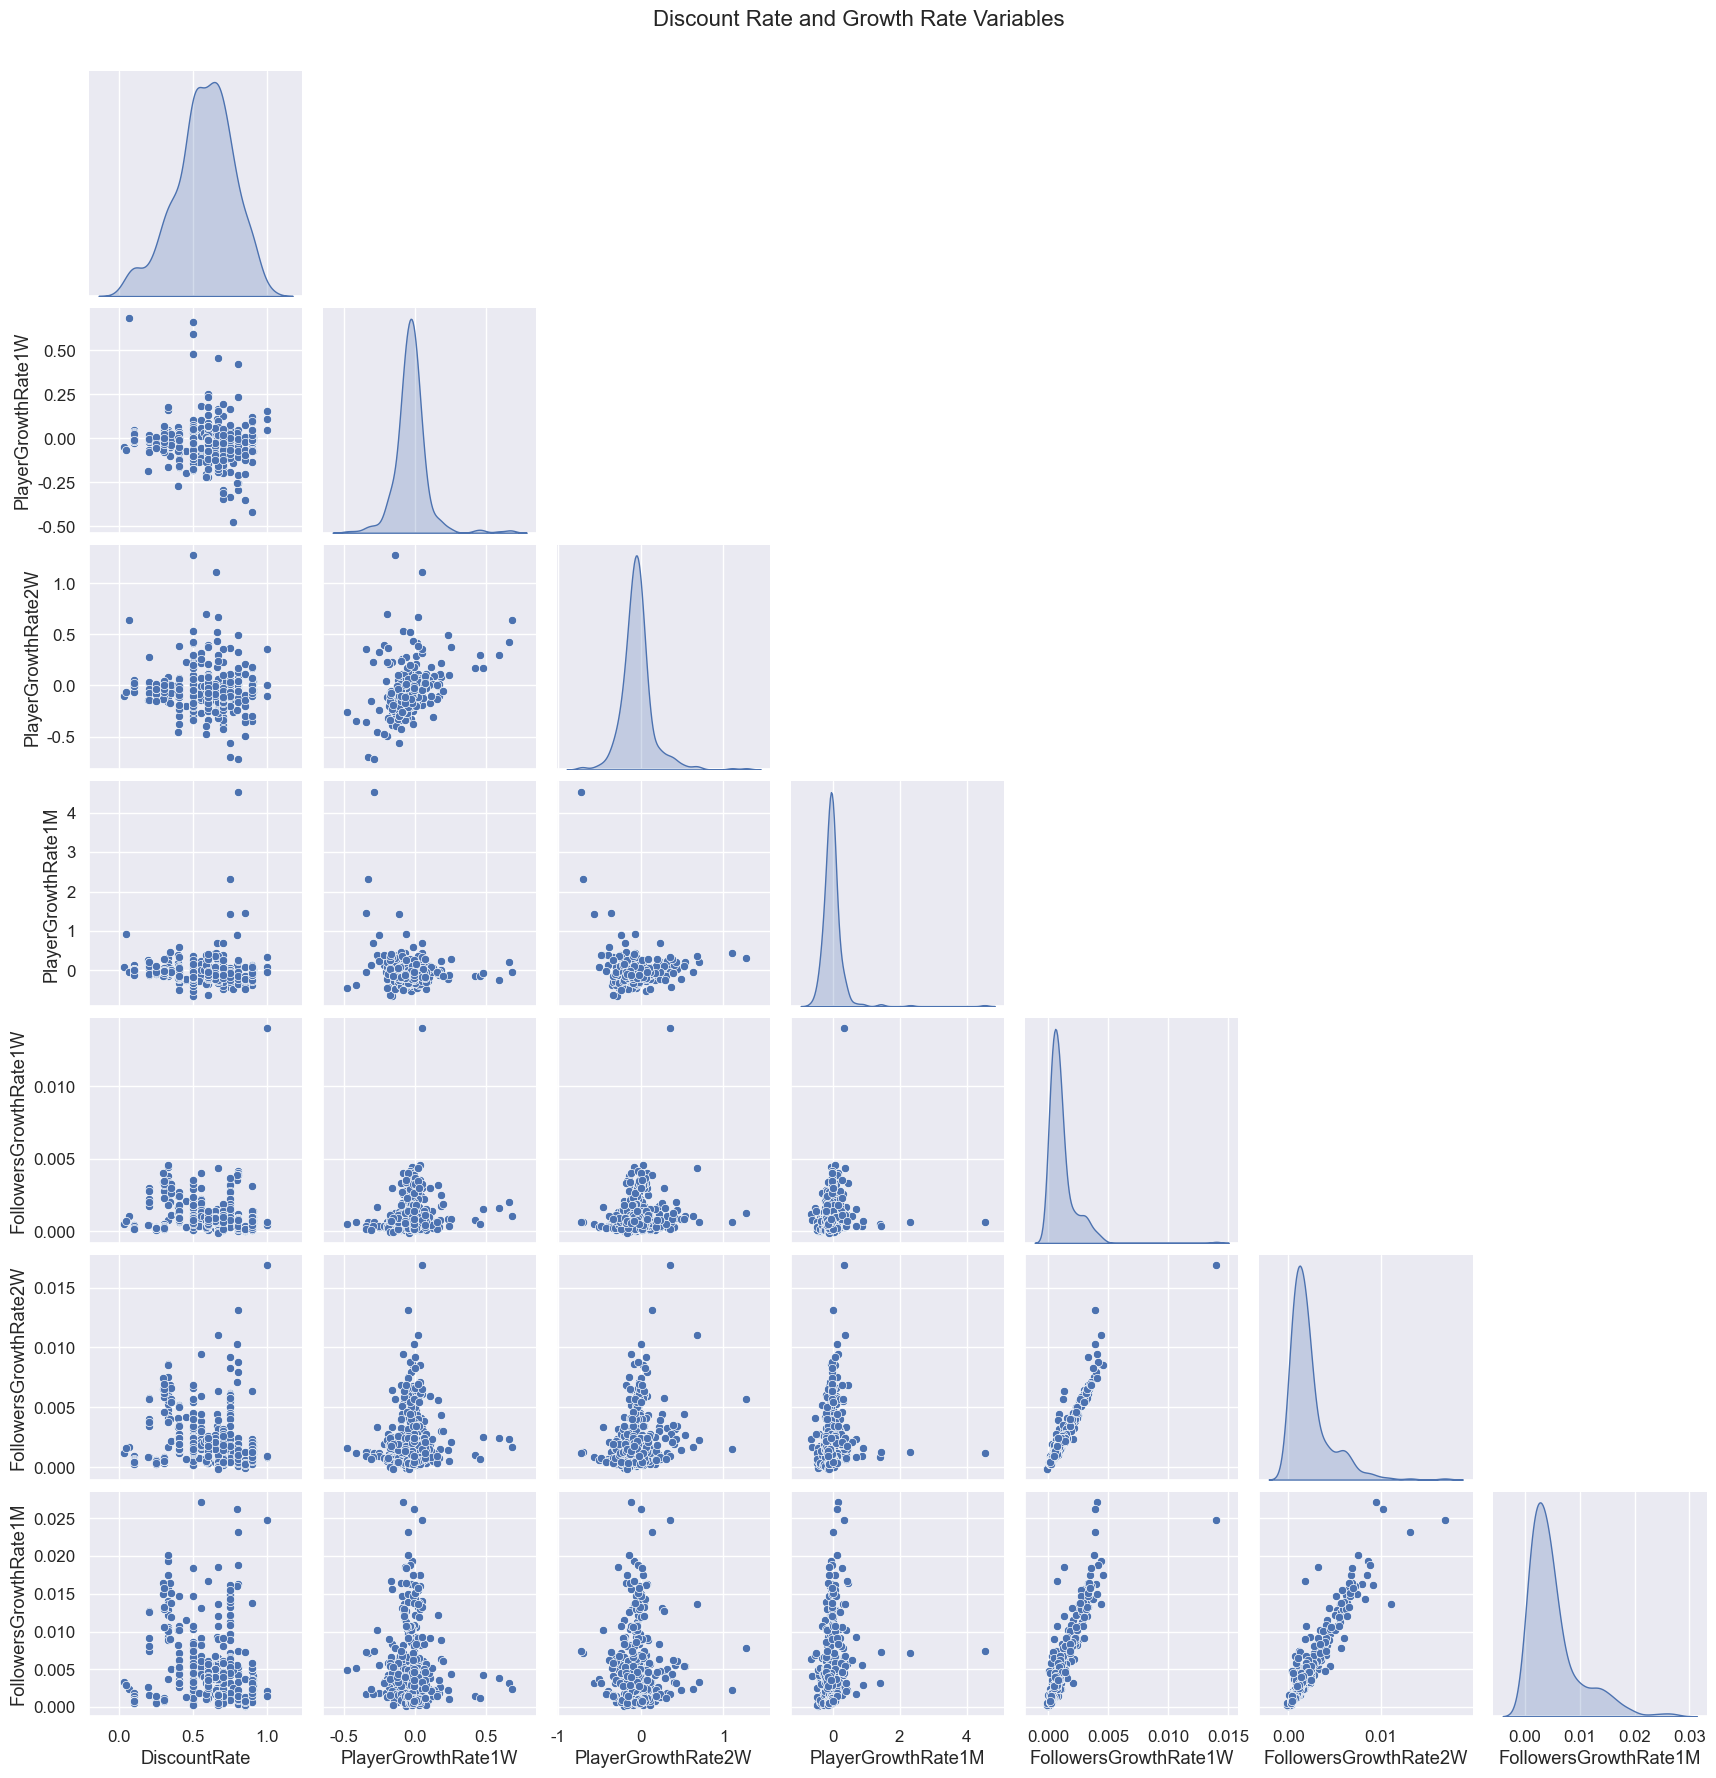

In [9]:
growth_cols = [
    "PlayerGrowthRate1W", "PlayerGrowthRate2W", "PlayerGrowthRate1M",
    "FollowersGrowthRate1W", "FollowersGrowthRate2W", "FollowersGrowthRate1M",
    "PositiveRateGrowthRate1W", "PositiveRateGrowthRate2W", "PositiveRateGrowthRate1M",
    "DLC_since_last_discount", "Sequel_since_last_discount"
]

# 散佈圖矩陣
subset_cols = ["DiscountRate"] + growth_cols[:6]  # 取前幾個主要變數
sns.pairplot(df[subset_cols], diag_kind="kde", corner=True)
plt.suptitle("Discount Rate and Growth Rate Variables", y=1.02, fontsize=16)
plt.show()

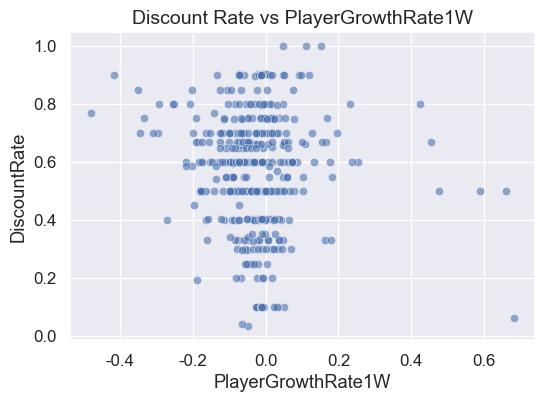

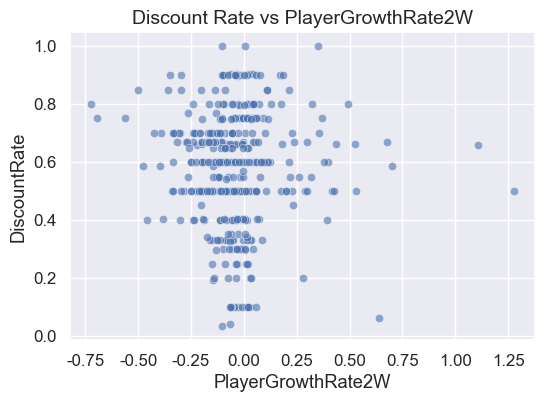

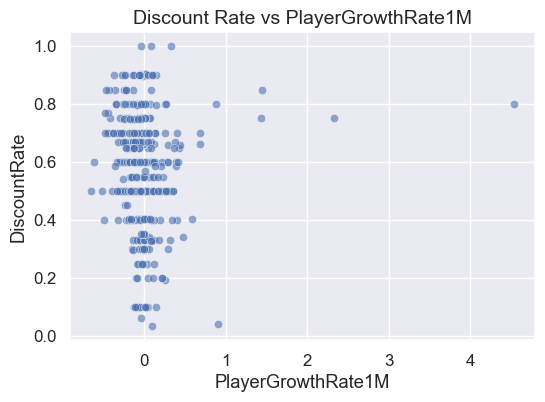

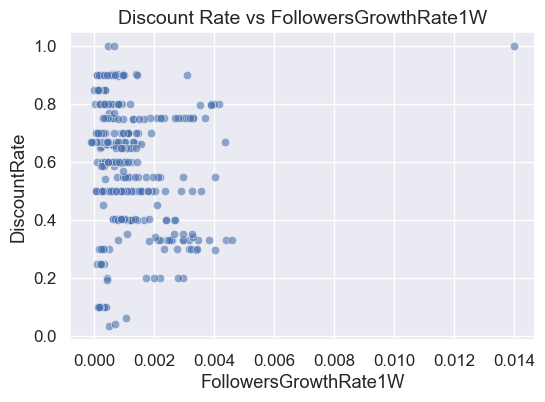

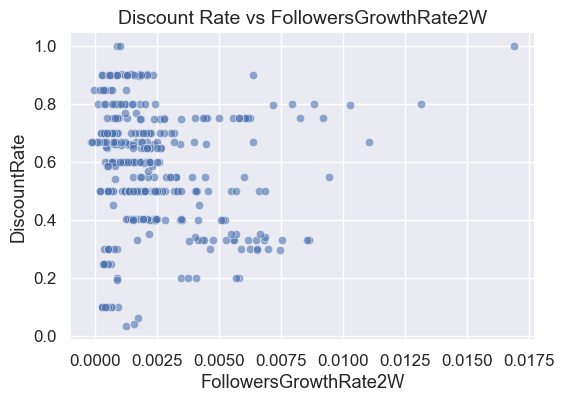

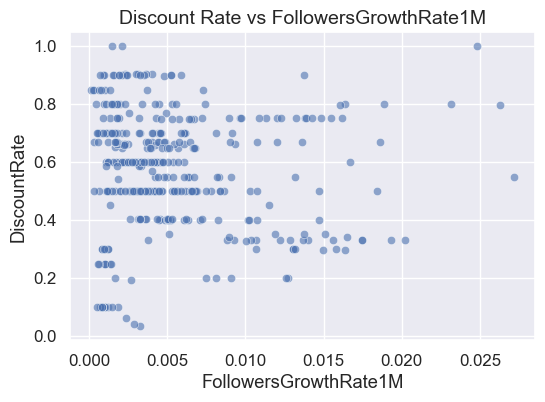

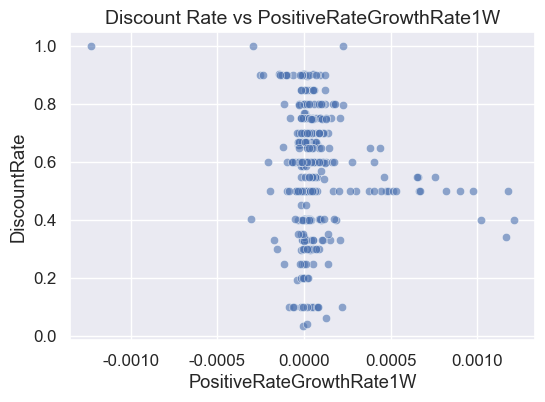

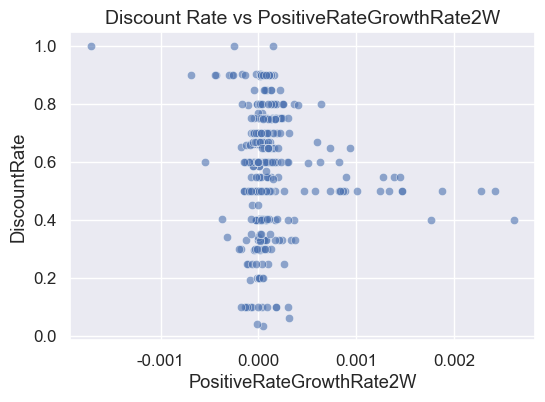

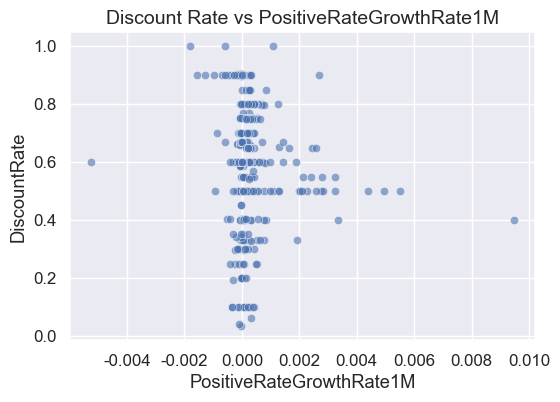

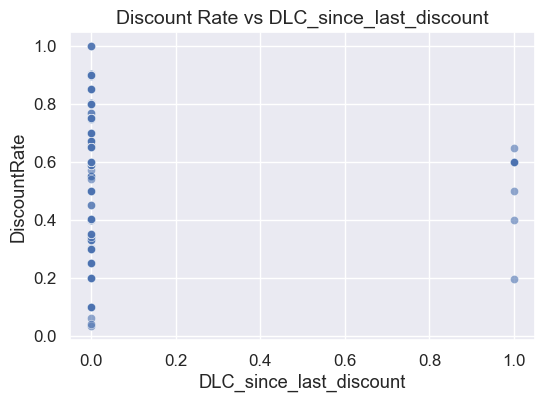

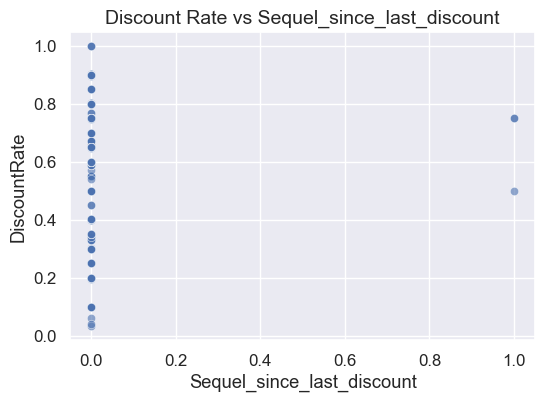

In [10]:
for col in growth_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="DiscountRate", alpha=0.6)
    plt.title(f"Discount Rate vs {col}", fontsize=14)
    plt.show()

### D. 整體相關性

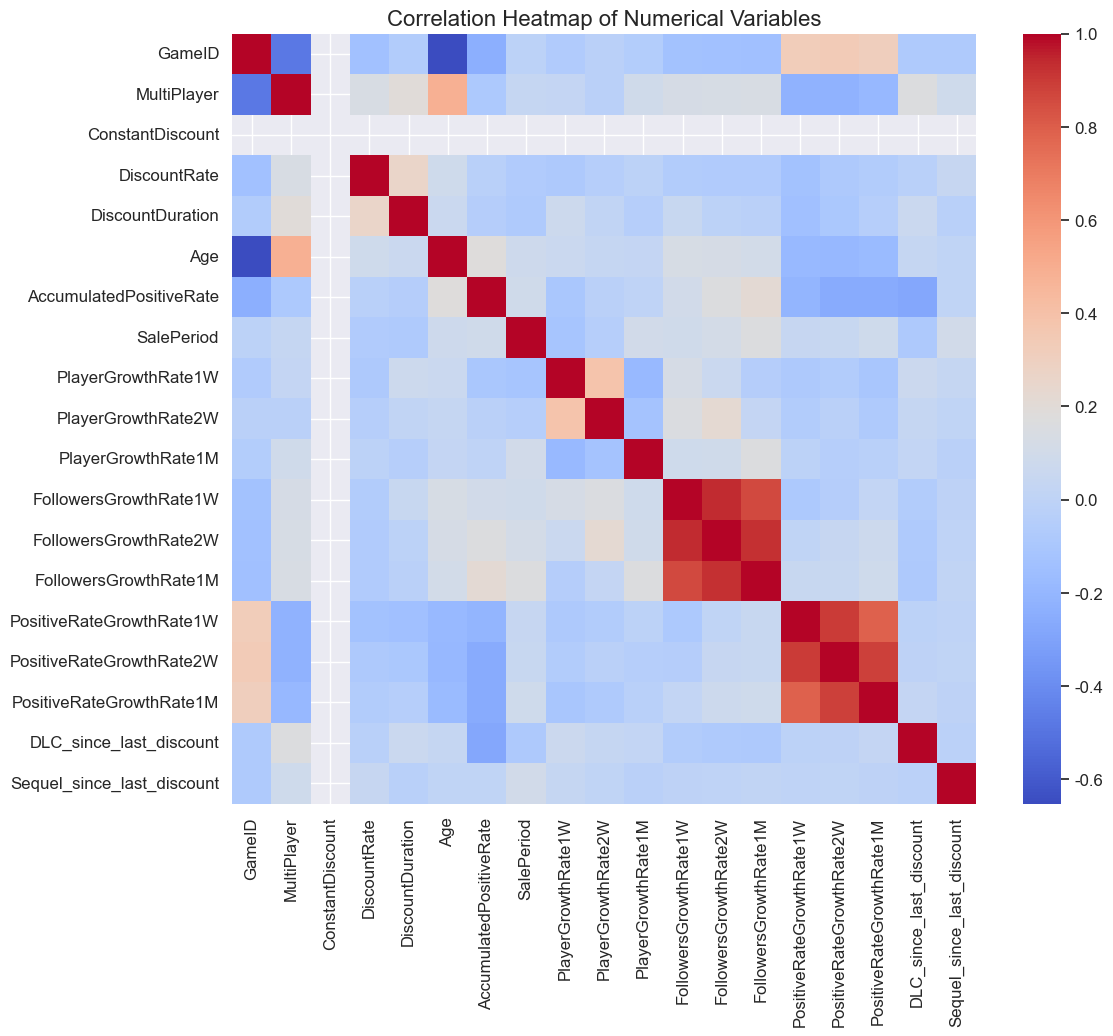

與 DiscountRate 最相關的變數前 8 名：


DiscountDuration              0.258958
MultiPlayer                   0.141019
Age                           0.089769
Sequel_since_last_discount    0.042201
PlayerGrowthRate1M           -0.007559
DLC_since_last_discount      -0.026734
AccumulatedPositiveRate      -0.031029
PlayerGrowthRate2W           -0.039454
Name: DiscountRate, dtype: float64

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

# 顯示與 DiscountRate 相關最高的前 8 名
top_corr = corr["DiscountRate"].drop("DiscountRate").sort_values(ascending=False)
print("與 DiscountRate 最相關的變數前 8 名：")
display(top_corr.head(8))